In [ ]:
import numpy as np
import pandas as pd
# Data visualisation & Preparation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import scikitplot as skplt
from sklearn import preprocessing as prep
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# Support Vector Classifications
from sklearn.svm import SVC




In [ ]:
credit = pd.read_csv('../input/default/default.csv')
credit

In [ ]:
credit.info()

In [ ]:
credit.describe()

In [ ]:
# rename the target column
credit.rename(columns={"default payment next month": "default"}, inplace = True)

In [ ]:
# check unique values in different features
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique())

In [ ]:
# 上面可以看见Education多出来几类

# 把教育程度4,5,6，0不知道是啥的类别全归为others
fil = (credit['EDUCATION'] == 5) | (credit['EDUCATION'] == 6) | (credit['EDUCATION'] == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit['EDUCATION'].value_counts()

In [ ]:
# 婚姻状况同样的操作
fil = (credit['MARRIAGE'] == 0)
credit.loc[fil, 'MARRIAGE'] = 3
credit['MARRIAGE'].value_counts()

In [ ]:
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique())

# EDA

plt.figure(figsize = (30,25))
hm = credit_final.corr()

sns.heatmap(hm, cmap = 'vlag', annot=True)
plt.title('The Correlation Heatmap')
plt.show()

# 数据非均衡（Imbalanced Data）

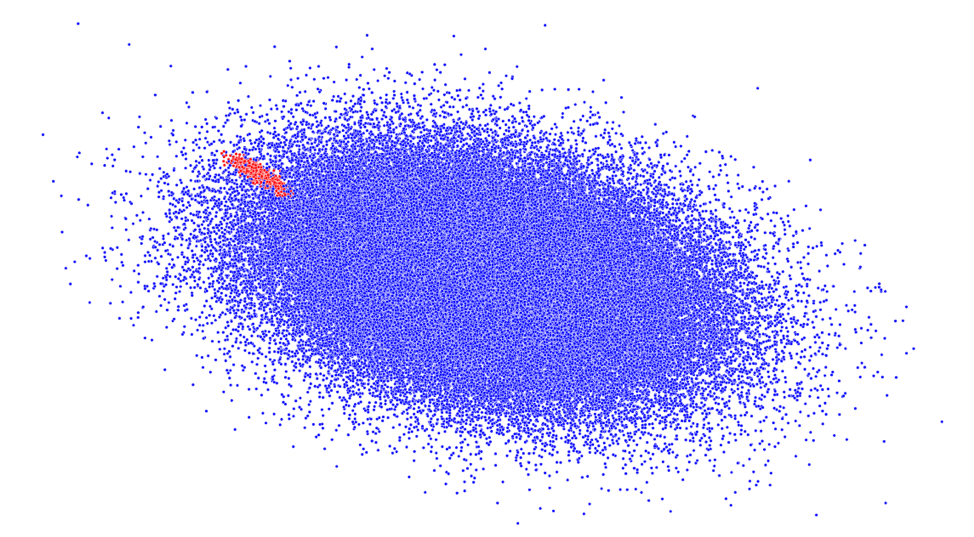
简单说你的分类器训练集数据不是5/5开或者6/4开，预测结果就很容易具有欺骗性

比如：选取的样本98%客户都违约，那只要预测全猜违约，准确率就能达到98%...这显然不科学...

In [ ]:
# check data balance
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

plt.figure(figsize = (6,6))
ax = sns.countplot('default', data = credit)
plt.xticks(size = 12)
plt.xlabel('default', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

without_hue(ax, credit.default)

In [ ]:
# Eduation
# 1：研究生、2：本科、3：高中、4：其他

pd.crosstab(credit.EDUCATION,credit.default).plot(kind='bar')
plt.title('Default Frequency by Educational Level')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

In [ ]:
# Marriage
# 1: 已婚、2：未婚、3：其他

pd.crosstab(credit.MARRIAGE,credit.default).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

In [ ]:
# SEX
# 1：男 、2：女

pd.crosstab(credit.SEX,credit.default).plot(kind='bar')
plt.title('Default Frequency by Gender')
plt.xlabel('SEX')
plt.ylabel('default')
plt.show()

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['LIMIT_BAL'], bins=30, alpha = 0.5)
plt.xlabel('LIMIT_BAL')

plt.title("The Frequency Histogram of LIMIT_BAL")
plt.show()

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['AGE'], bins=30, facecolor='red', alpha = 0.5)
plt.xlabel('AGE')

plt.title("The Frequency Histogram of Age")
plt.show()

In [ ]:
# Creating a new dataframe with categorical variables
subset = credit[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Default Frequency of Important Features')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2]);

In [ ]:
x1 = list(credit[credit['default'] == 1]['LIMIT_BAL'])
x2 = list(credit[credit['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['firebrick', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Default Histogram by Limit Balance', SIZE=15)
plt.box(False)
plt.show()

## One-Hot Encoding

Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

In [ ]:
# 教育水平
# generate binary values using get_dummies
credit_dum = pd.get_dummies(credit, columns=["EDUCATION"], prefix=["Edu"] )
# merge with main df bridge_df on key values
credit_dum = credit.merge(credit_dum, how='outer')
credit_dum

In [ ]:
# 性别
# generate binary values using get_dummies
credit_dum2 = pd.get_dummies(credit, columns=["SEX"], prefix=["SEX"] )
# merge with main df bridge_df on key values
credit_dum2 = credit_dum.merge(credit_dum2, how='outer')
credit_dum2

In [ ]:
# 婚姻
# generate binary values using get_dummies
credit_dum3 = pd.get_dummies(credit, columns=["MARRIAGE"], prefix=["MARRIAGE"] )
# merge with main df bridge_df on key values
credit_dum3 = credit_dum2.merge(credit_dum3, how='outer')
credit_dum3

In [ ]:
# Pay_0
# generate binary values using get_dummies
credit_dum4 = pd.get_dummies(credit, columns=["PAY_0"], prefix=["p0"] )
# merge with main df bridge_df on key values
credit_dum4 = credit_dum3.merge(credit_dum4, how='outer')
credit_dum4

In [ ]:
# Pay_2
# generate binary values using get_dummies
credit_dum5 = pd.get_dummies(credit, columns=["PAY_2"], prefix=["p2"] )
# merge with main df bridge_df on key values
credit_dum5 = credit_dum4.merge(credit_dum5, how='outer')
credit_dum5

In [ ]:
# Pay_3
# generate binary values using get_dummies
credit_dum6 = pd.get_dummies(credit, columns=["PAY_3"], prefix=["p3"] )
# merge with main df bridge_df on key values
credit_dum6 = credit_dum5.merge(credit_dum6, how='outer')
credit_dum6

In [ ]:
# Pay_4
# generate binary values using get_dummies
credit_dum7 = pd.get_dummies(credit, columns=["PAY_4"], prefix=["p4"] )
# merge with main df bridge_df on key values
credit_dum7 = credit_dum6.merge(credit_dum7, how='outer')
credit_dum7

In [ ]:
# Pay_5
# generate binary values using get_dummies
credit_dum8 = pd.get_dummies(credit, columns=["PAY_5"], prefix=["p5"] )
# merge with main df bridge_df on key values
credit_dum8 = credit_dum7.merge(credit_dum8, how='outer')
credit_dum8

In [ ]:
# Pay_6
# generate binary values using get_dummies
credit_dum9 = pd.get_dummies(credit, columns=["PAY_6"], prefix=["p6"] )
# merge with main df bridge_df on key values
credit_dum9 = credit_dum8.merge(credit_dum9, how='outer')
credit_dum9

In [ ]:
credit_dum9 = credit_dum9.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
credit_dum9

In [ ]:
credit_dum9.info()

# Normalization: Applying MinMax Scaler

In [ ]:
minmax_scale = prep.MinMaxScaler().fit(credit_dum9)
credit_minmax = minmax_scale.transform(credit_dum9)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(credit_dum9))
credit_minmax

In [ ]:
credit_minmax.hist(figsize=(20,20))
plt.show()

# Dividing the data into train and test

In [ ]:
X = credit_minmax.drop(["default"],axis=1)
y = credit_minmax["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

In [ ]:
# Run the logistic regression model on Imbalanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
print("Accuracy:")
a = accuracy_score(y_test,prediction)
print(a)

prediction = dict()
prediction['Logistic'] = logreg.predict(X_test)
print('f1 Score:' ,metrics.f1_score(y_test, prediction['Logistic']))

confusion_matrix = cm(y_test, prediction['Logistic'])
print(confusion_matrix)

print(classification_report(y_test, prediction['Logistic']))

skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['Logistic'],normalize=True)
plt.show()

# Oversampling on Training Set

In [ ]:
# define training set
df_train = pd.concat([X_train, y_train],axis=1)
df_train

In [ ]:
# define test set
df_test = pd.concat([X_test, y_test],axis=1)
df_test

In [ ]:
# summarize target variable distribution (training set)
count_class_0, count_class_1 = df_train.default.value_counts()
count_class_0, count_class_1

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train.default==0]
df_minority = df_train[df_train.default==1]

df_minority_upsampled = df_minority.sample(count_class_0, replace=True)
df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)
 
print('Random Oversampling:')
print(df_upsampled.default.value_counts())
 

df_upsampled.default.value_counts().plot(kind='bar', title='Count (default)');

# Splitting the new upsampled dataset

In [ ]:
X_train_upsampled = df_upsampled.drop(["default"],axis=1)
y_train_upsampled = df_upsampled["default"]

# 机器学习 Machine Learning

分类问题 Classification
- 逻辑回归 Logistic regression
- 决策树 Decision tree
- 随机森林 Random forest
- 支持向量 Support Vector Classifications
- Stocastic Gradient Descend
- K-Nearest Neighbours Classifiers
- Gaussian Process Classification
- Other ensemble
- 神经网络 Neural Network Models
- XGBoost

# Logistic Regression


In [ ]:
# Run the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_upsampled, y_train_upsampled)
y_pred = logreg.predict(X_test)
confusion_matrix = cm(y_test, y_pred)
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)
plt.show()

print(classification_report(y_test, y_pred))

# Random Forest

In [ ]:
clf = RandomForestClassifier(n_jobs=1000,
                            random_state=9,
                            n_estimators=11,
                            verbose=False)
clf.fit(X_train_upsampled, y_train_upsampled)
prediction['RandomForest'] = clf.predict(X_test)
r = accuracy_score(prediction['RandomForest'],y_test)
print(r)

confusion_matrix = cm(y_test, prediction['RandomForest'])
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, prediction['RandomForest'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['RandomForest'],normalize=True)
plt.show()

print(classification_report(y_test, prediction['RandomForest']))

# Decision Tree Classifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                 max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train_upsampled, y_train_upsampled)

prediction['DecisionTree'] = clf_gini.predict(X_test)
print("The Classification Report of Decision Tree Model")
t = classification_report(y_test, prediction['DecisionTree'])
print(t)

confusion_matrix = cm(y_test, prediction['DecisionTree'])
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, prediction['DecisionTree'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['DecisionTree'],normalize=True)
plt.show()

In [ ]:
from sklearn import datasets,tree
from sklearn import externals
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

# K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_upsampled,y_train_upsampled)
pred = knn.predict(X_test)
print(cm(y_test,pred))
print(classification_report(y_test,pred))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
plt.show()

# Model Comparison

In [ ]:
random_seed = 12

In [ ]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),  
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier())]

In [ ]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X_train_upsampled, y_train_upsampled, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

In [ ]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()